# Predicting March Madness Winners

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### teams.csv

In [2]:
teams_data=pd.read_csv('Data/teams.csv')
teams_data

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M
...,...,...
359,1460,Wright St
360,1461,Wyoming
361,1462,Xavier
362,1463,Yale


In [3]:
teams_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    364 non-null    int64 
 1   team_name  364 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


**teams_data:**
    - _team_id_ - All id values are four-digit numbers, starting with 1101, and the ids are assigned in alphabetical order
    - _team_name_ - this is the text name of the team

### seasons.csv

In [4]:
seasons_data=pd.read_csv('Data/seasons.csv')
seasons_data

,season,dayzero,regionW,regionX,regionY,regionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/02/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/04/1991,East,West,Midwest,Southeast
8,1993,11/02/1992,East,Midwest,Southeast,West
9,1994,11/01/1993,East,Southeast,Midwest,West


In [5]:
seasons_data['dayzero']=pd.to_datetime(seasons_data['dayzero'])

In [6]:
seasons_data.nunique()

season     31
dayzero    31
regionW     3
regionX     7
regionY     6
regionZ     7
dtype: int64

In [7]:
seasons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   season   31 non-null     int64         
 1   dayzero  31 non-null     datetime64[ns]
 2   regionW  31 non-null     object        
 3   regionX  31 non-null     object        
 4   regionY  31 non-null     object        
 5   regionZ  31 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ KB


**seasons_data**
- _season_ indicates the year of season
- _dayzero_ tells you the date corresponding to daynum=0 during that season
- _regionW/X/Y/Z_ the four regions in the final tournament are always named W, X, Y, and Z

### regular_season_compact_results.csv

In [8]:
reg_season_results=pd.read_csv('Data/regular_season_compact_results.csv')
reg_season_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
134561,2014,132,1196,61,1246,60,N,0
134562,2014,132,1277,69,1276,55,N,0
134563,2014,132,1386,65,1433,61,N,0
134564,2014,132,1418,82,1209,81,N,1


In [9]:
reg_season_results['wloc'].value_counts()

H    80225
A    40883
N    13458
Name: wloc, dtype: int64

In [10]:
reg_season_results['wloc']=reg_season_results['wloc'].astype('category')

In [11]:
reg_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134566 entries, 0 to 134565
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   season  134566 non-null  int64   
 1   daynum  134566 non-null  int64   
 2   wteam   134566 non-null  int64   
 3   wscore  134566 non-null  int64   
 4   lteam   134566 non-null  int64   
 5   lscore  134566 non-null  int64   
 6   wloc    134566 non-null  category
 7   numot   134566 non-null  int64   
dtypes: category(1), int64(7)
memory usage: 7.3 MB


In [12]:
reg_season_results['season'].value_counts()

2014    5362
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: season, dtype: int64

**Regular season results**
- _season_ year of the season
- _daynum_ this integer always ranges from 0 to 132, and tells you what day the game was played on, offset from _dayzero_
- _wteam_ id number of the team that won the
- _wscore_ number of points scored by the winning team
- _lteam_ id number of the team that lost the game
- _lscore_ number of points scored by the losing team
- _numnot_  number of overtime periods in the game
- _wloc_ this identifies the "location" of the winning team

### tourney_compact_results.csv

In [13]:
tourney_results_data=pd.read_csv('Data/tourney_compact_results.csv')
tourney_results_data

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
1911,2014,146,1163,60,1277,54,N,0
1912,2014,146,1246,75,1276,72,N,0
1913,2014,152,1163,63,1196,53,N,0
1914,2014,152,1246,74,1458,73,N,0


In [14]:
tourney_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  1916 non-null   int64 
 1   daynum  1916 non-null   int64 
 2   wteam   1916 non-null   int64 
 3   wscore  1916 non-null   int64 
 4   lteam   1916 non-null   int64 
 5   lscore  1916 non-null   int64 
 6   wloc    1916 non-null   object
 7   numot   1916 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 119.9+ KB


**tourney_results**
same as regular season results but after 132 day. All played on neutral location.

### tourney_seeds.csv

In [15]:
tourney_seeds_data=pd.read_csv('Data/tourney_seeds.csv')
tourney_seeds_data

,season,seed,team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
1941,2014,Z12,1295
1942,2014,Z13,1308
1943,2014,Z14,1418
1944,2014,Z15,1110


In [16]:
tourney_seeds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  1946 non-null   int64 
 1   seed    1946 non-null   object
 2   team    1946 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.7+ KB


In [17]:
tourney_seeds_data['season'].value_counts()

2014    68
2013    68
2012    68
2011    68
2010    65
2009    65
2008    65
2007    65
2006    65
2005    65
2004    65
2003    65
2002    65
2001    65
1986    64
1985    64
1999    64
1998    64
1997    64
1996    64
1995    64
1994    64
1993    64
1992    64
1991    64
1990    64
1989    64
1988    64
1987    64
2000    64
Name: season, dtype: int64

**tourney_seeds_data**
- _season_ year of the season
- _seed_ three-character identifier of the seed,first character is either W, X, Y, or Z, next two digits (either 01, 02, ..., 15, or 16) tells you the seed within the region
- _team_ the id number of the team

### tourney_slots.csv

In [18]:
tourney_slots_data=pd.read_csv('Data/tourney_slots.csv')
tourney_slots_data

,season,slot,strongseed,weakseed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14
3,1985,R1W4,W04,W13
4,1985,R1W5,W05,W12
...,...,...,...,...
1911,2014,R6CH,R5WX,R5YZ
1912,2014,X16,X16a,X16b
1913,2014,Y11,Y11a,Y11b
1914,2014,Y12,Y12a,Y12b


In [19]:
tourney_slots_data[['slot','strongseed','weakseed']].value_counts()

slot  strongseed  weakseed
R1W1  W01         W16         30
R2W1  R1W1        R1W8        30
R2W3  R1W3        R1W6        30
R2W4  R1W4        R1W5        30
R2X1  R1X1        R1X8        30
                              ..
W12   W12a        W12b         1
Z11   Z11a        Z11b         1
Z13   Z13a        Z13b         1
Z14   Z14a        Z14b         1
X12   X12a        X12b         1
Length: 74, dtype: int64

In [20]:
tourney_slots_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      1916 non-null   int64 
 1   slot        1916 non-null   object
 2   strongseed  1916 non-null   object
 3   weakseed    1916 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.0+ KB


**tourney_slots_data**
- _season_ the year of the season
- _slot_ uniquely identifies one of the tournament games,For play-in games, it is a three-character string identifying the seed fulfilled by the winning team, such as W16 or Z13. For regular tournament games, it is a four-character string, where the first two characters tell you which round the game is (R1, R2, R3, R4, R5, or R6) and the second two characters tell you the expected seed of the favored team
- _strongseed_ indicates the expected stronger-seeded team that plays in this game
- _weakseed_ indicates the expected weaker-seeded team that plays in this game, assuming all favored teams have won so far

### regular_season_detailed_results.csv

In [21]:
reg_season_detailed_res=pd.read_csv('Data/regular_season_detailed_results.csv')
reg_season_detailed_res

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60513,2014,132,1196,61,1246,60,N,0,23,53,...,11,21,26,12,24,9,12,4,8,19
60514,2014,132,1277,69,1276,55,N,0,27,54,...,23,15,16,13,15,7,9,3,3,15
60515,2014,132,1386,65,1433,61,N,0,24,50,...,19,8,15,13,25,9,5,6,6,18
60516,2014,132,1418,82,1209,81,N,1,32,75,...,19,20,21,4,26,8,7,5,7,15


**reg_season_detailed_res**
same as reg_season_res but additional details were added:
- _wfgm_ - field goals made
- _wfga_ - field goals attempted
- _wfgm3_ - three pointers made
- _wfga3_ - three pointers attempted
- _wftm_ - free throws made
- _wfta_ - free throws attempted
- _wor_ - offensive rebounds
- _wdr_ - defensive rebounds
- _wast_ - assists
- _wto_ - turnovers
- _wstl_ - steals
- _wblk_ - blocks
- _wpf_ - personal fouls

w indicates of wining team, same rules apply to losing team (category starts with l)


### tourney_detailed_results.csv

In [22]:
tourney_detailed_res=pd.read_csv('Data/tourney_detailed_results.csv')
tourney_detailed_res

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,146,1163,60,1277,54,N,0,17,49,...,29,7,8,6,26,13,16,5,3,16
776,2014,146,1246,75,1276,72,N,0,31,58,...,18,11,14,14,10,11,7,4,1,14
777,2014,152,1163,63,1196,53,N,0,24,43,...,10,14,20,12,15,3,11,3,1,14
778,2014,152,1246,74,1458,73,N,0,29,58,...,20,19,20,6,21,11,8,4,3,18


## Visualisation of data

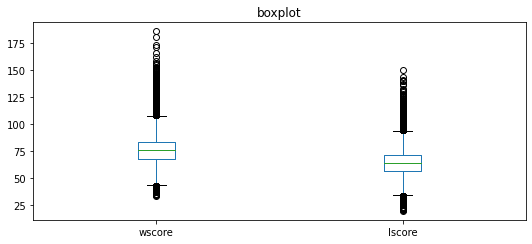

In [23]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax_wl = reg_season_results[['wscore', 'lscore']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [24]:
reg_season_results[reg_season_results['wscore']>140]

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
1126,1985,65,1424,142,1429,140,A,0
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
12482,1988,57,1328,144,1331,93,N,0
14081,1988,96,1439,141,1379,133,H,0
14605,1988,110,1258,142,1337,127,H,0
14895,1988,117,1258,141,1360,126,A,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0


In [25]:
reg_season_results['lscore'].min()

20

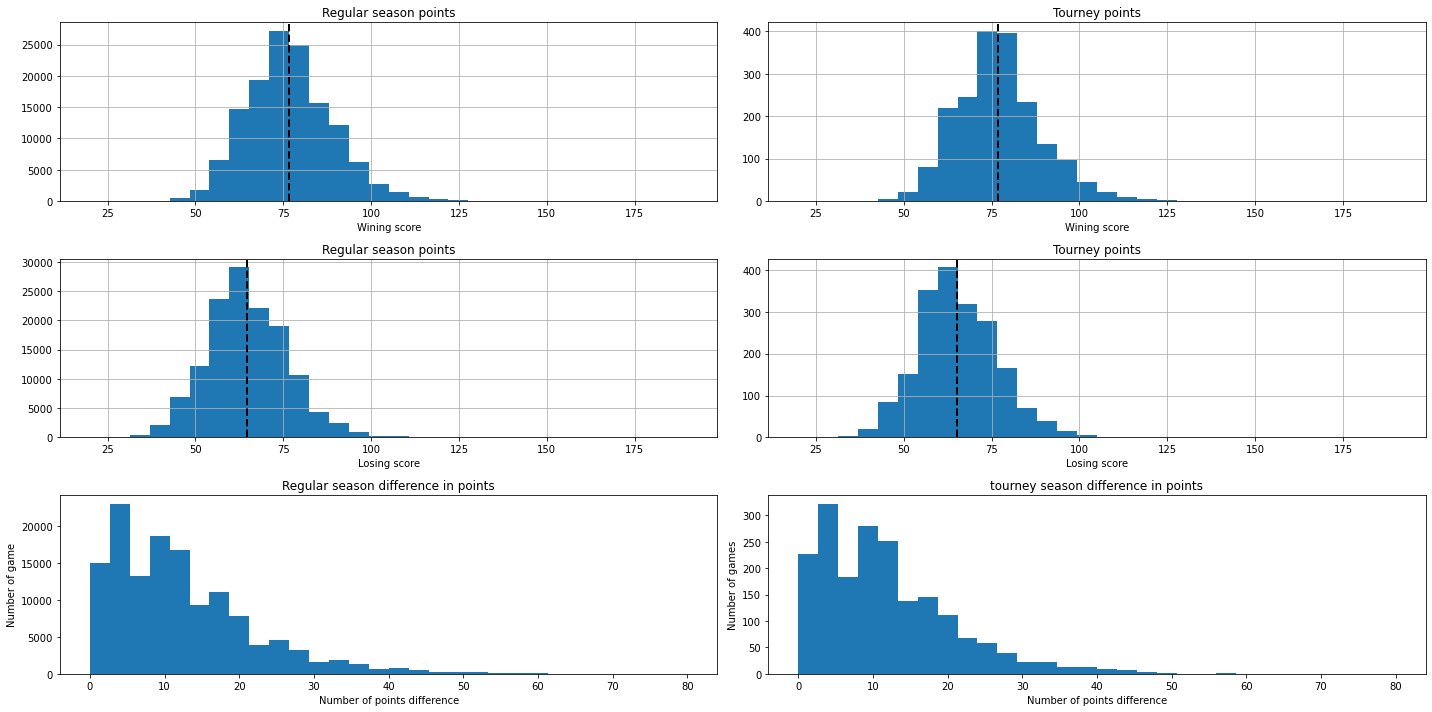

In [26]:
fig, ax = plt.subplots(3,2, figsize=(20,10))

ax[0,0].hist(reg_season_results['wscore'], bins=30,range=[20,190])
ax[0,0].grid()
ax[0,0].set_xlabel('Wining score')
ax[0,0].set_title('Regular season points')
ax[0,0].axvline(reg_season_results['wscore'].mean(), color='k', linestyle='dashed', linewidth=2)


ax[0,1].hist(tourney_results_data['wscore'], bins=30,range=[20,190])
ax[0,1].grid()
ax[0,1].set_xlabel('Wining score')
ax[0,1].set_title('Tourney points')
ax[0,1].axvline(tourney_results_data['wscore'].mean(), color='k', linestyle='dashed', linewidth=2)

ax[1,0].hist(reg_season_results['lscore'], bins=30,range=[20,190])
ax[1,0].grid()
ax[1,0].set_xlabel('Losing score')
ax[1,0].set_title('Regular season points')
ax[1,0].axvline(reg_season_results['lscore'].mean(), color='k', linestyle='dashed', linewidth=2)

ax[1,1].hist(tourney_results_data['lscore'], bins=30,range=[20,190])
ax[1,1].grid()
ax[1,1].set_xlabel('Losing score')
ax[1,1].set_title('Tourney points')
ax[1,1].axvline(tourney_results_data['lscore'].mean(), color='k', linestyle='dashed', linewidth=2)

ax[2,0].hist(reg_season_results['wscore']-reg_season_results['lscore'],bins=30,range=[0,80])
ax[2,0].set_xlabel('Number of points difference')
ax[2,0].set_title('Regular season difference in points')
ax[2,0].set_ylabel('Number of game')

ax[2,1].hist(tourney_results_data['wscore']-tourney_results_data['lscore'],bins=30,range=[0,80])
ax[2,1].set_xlabel('Number of points difference')
ax[2,1].set_title('tourney season difference in points')
ax[2,1].set_ylabel('Number of games')


plt.show()

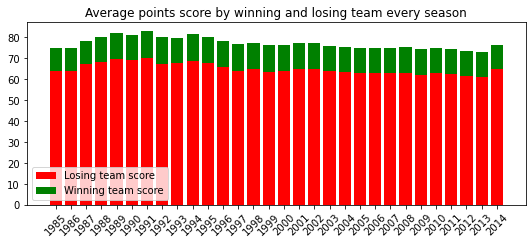

In [27]:
all_season=pd.concat([reg_season_results,tourney_results_data])
yearly_season_points=all_season.merge(seasons_data,on='season',how='left').groupby('season').agg({'wscore':'mean','lscore':'mean'})
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.bar(yearly_season_points.index,yearly_season_points['lscore'],color='red' ,label='Losing team score')
plt.bar(yearly_season_points.index,yearly_season_points['wscore']-yearly_season_points['lscore'],color='green', label='Winning team score',bottom=yearly_season_points['lscore'])
plt.xticks(yearly_season_points.index,rotation=45)
plt.title('Average points score by winning and losing team every season')
plt.legend(loc='lower left')
plt.show()

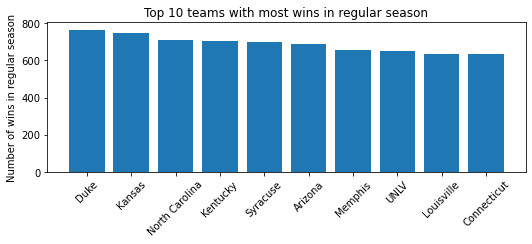

In [28]:
teams_reg_season=pd.merge(teams_data,reg_season_results, how='inner', left_on = 'team_id', right_on = 'wteam').groupby('team_name')['team_name'].count()
top_teams=teams_reg_season.sort_values(ascending=False)
plt.bar(top_teams.index[:10],top_teams.values[:10])
plt.xticks(rotation=45)
plt.ylabel('Number of wins in regular season')
plt.title('Top 10 teams with most wins in regular season')
plt.show()

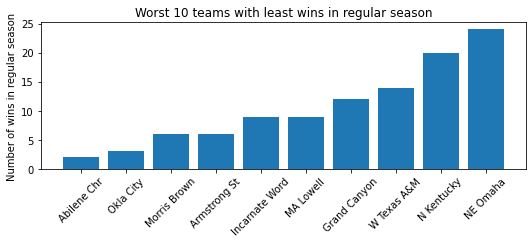

In [29]:
teams_reg_season=pd.merge(teams_data,reg_season_results, how='inner', left_on = 'team_id', right_on = 'wteam').groupby('team_name')['team_name'].count()
top_teams=teams_reg_season.sort_values(ascending=True)
plt.bar(top_teams.index[:10],top_teams.values[:10])
plt.xticks(rotation=45)
plt.ylabel('Number of wins in regular season')
plt.title('Worst 10 teams with least wins in regular season')
plt.show()

# Replicating results


### data selection
- selecting data in the training data included results from the 2011-2014 regular season and 2011-2013 NCAA tournament games

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from tqdm import tqdm

In [31]:
data_train=pd.concat([reg_season_detailed_res[(reg_season_detailed_res['season']>2010)],tourney_detailed_res[(tourney_detailed_res['season']>=2011)&(tourney_detailed_res['season']<=2013)]])
num_of_teams=pd.concat([data_train['wteam'],data_train['lteam']],axis=0)
teams_train=num_of_teams.unique()

In [32]:
data_train.reset_index(inplace=True)
data_train.drop(columns=['wfga3','wfgm3','wfta','wftm','wor','wdr','wast','wto','wpf','lfga3','lfgm3','lfta','lftm','lor','ldr','last','lto','lpf','index'],inplace=True)
data_train.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,wstl,wblk,lfgm,lfga,lstl,lblk
0,2011,7,1228,79,1414,65,H,0,29,58,9,8,22,63,7,1
1,2011,7,1268,105,1370,76,H,0,35,62,9,9,28,77,18,1
2,2011,7,1338,83,1348,75,H,0,29,64,8,6,24,60,7,6
3,2011,7,1400,83,1298,52,H,0,30,59,5,5,19,63,5,5
4,2011,9,1228,84,1405,45,H,0,37,64,10,7,16,45,6,0


In [33]:
teams_stats=pd.DataFrame()
yearly_won_against=list()
yearly_lost_against=list()
for year in [2011,2012,2013,2014]:
    team_won_against=dict()
    team_lost_against=dict()
    for team_id in tqdm(teams_train):
        season_train_data=data_train[data_train['season']==year]
        season_average_points=((np.sum(season_train_data['wscore'])+np.sum(season_train_data['lscore']))/(2*len(season_train_data)))

        team_won=data_train[(data_train['wteam']==team_id)&(data_train['season']==year)]
        team_lost=data_train[(data_train['lteam']==team_id) & (data_train['season']==year)]

        if len(team_won)<1 and len(team_lost)<1:
            continue

        point_total_diff=np.sum(team_won['wscore']-team_won['lscore'])+np.sum(team_lost['lscore']-team_lost['wscore'])
        #point_total_diff=point_total_diff/(len(team_won)+len(team_lost))

        steals_total_diff=np.sum(team_won['wstl']-team_won['lstl'])+np.sum(team_lost['lstl']-team_lost['wstl'])
        steals_total_diff=steals_total_diff/(len(team_won)+len(team_lost))

        block_total_diff=np.sum(team_won['wblk']-team_won['lblk'])+np.sum(team_lost['lblk']-team_lost['wblk'])
        block_total_diff=block_total_diff/(len(team_won)+len(team_lost))

        if len(team_lost)>0:
            l_field_goal_perc=(np.sum(team_lost['lfgm'])/np.sum(team_lost['lfga']))*100
        else:
            l_field_goal_perc=0
        if len(team_won)>0:
            w_field_goal_perc=(np.sum(team_won['wfgm'])/np.sum(team_won['wfga']))*100
        else:
            w_field_goal_perc=0

        field_goal_perc_diff=(np.sum(team_lost['lfgm'])+np.sum(team_won['wfgm']))/(np.sum(team_lost['lfga'])+np.sum(team_won['wfga']))


        # WP by home win 0.6, home loss 1.4, away win 1.4, away loss 0.6, neutral 1
        team_won_home=team_won[team_won['wloc']=='H']
        team_won_away=team_won[team_won['wloc']=='A']
        team_won_neutral=team_won[team_won['wloc']=='N']

        team_lost_home=team_lost[team_lost['wloc']=='A']
        team_lost_away=team_won[team_won['wloc']=='H']
        team_lost_neutral=team_lost[team_lost['wloc']=='N']

        wins_scaled=len(team_won_home)*0.6+len(team_won_neutral)+len(team_won_away)*1.4
        loss_scaled=len(team_lost_away)*0.6+len(team_won_neutral)+len(team_lost_home)*1.4

        WP=wins_scaled/(wins_scaled+loss_scaled)
        WP_non_scaled=len(team_won)/(len(team_won)+len(team_lost))
        team_won_against[team_id]=team_won['lteam'].to_list()
        team_lost_against[team_id]=team_lost['wteam'].to_list()

        team_avg_points=(team_won['wscore'].sum()+team_lost['lscore'].sum())/(len(team_won)+len(team_lost))
        BPI=season_average_points-team_avg_points

        row=pd.Series({'team_id':team_id,'ptdiff':point_total_diff,'stdiff':steals_total_diff,'btdiff':block_total_diff,'fgpdiff':field_goal_perc_diff*100,'BPI':BPI,'WP':WP,'winloss_ration':WP_non_scaled,'season':year})
        teams_stats=teams_stats.append(row,ignore_index=True)
    yearly_won_against.append(team_won_against)
    yearly_lost_against.append(team_lost_against)


100%|██████████| 352/352 [00:04<00:00, 79.37it/s]


In [34]:
teams_stats.head()

,BPI,WP,btdiff,fgpdiff,ptdiff,season,stdiff,team_id,winloss_ration
0,-2.559145,0.523490,1.676471,46.806283,191.0,2011.0,-0.088235,1228.0,0.588235
1,-8.437041,0.500000,0.939394,47.070707,305.0,2011.0,0.666667,1268.0,0.575758
2,-5.529733,0.585366,-0.882353,47.481243,441.0,2011.0,-0.205882,1338.0,0.823529
3,-6.616334,0.583732,2.166667,45.450214,463.0,2011.0,0.444444,1400.0,0.777778
4,1.755194,0.604478,1.250000,44.494131,237.0,2011.0,3.156250,1104.0,0.656250


In [35]:
# calculating yearly OWP
yearly_owp_stats=dict()
for index,year in enumerate([2011,2012,2013,2014]):
    owp_stats=dict()
    for team_id in tqdm(yearly_lost_against[index]):
        team_won=data_train[(data_train['wteam']==team_id)&(data_train['season']==year)]
        team_lost=data_train[(data_train['lteam']==team_id)&(data_train['season']==year)]

        sum_of_w_ration=0

        yearly_lost_against[index][team_id].extend(yearly_won_against[index][team_id])
        for twa in yearly_lost_against[index][team_id]:
            twa_won=data_train[(data_train['wteam']==twa)&(data_train['lteam']!=team_id)&(data_train['season']==year)]
            twa_lost=data_train[(data_train['lteam']==twa)&(data_train['wteam']!=team_id)&(data_train['season']==year)]
            w_ration=len(twa_won)/(len(twa_lost)+len(twa_won))
            sum_of_w_ration+=w_ration
        owp_stats[team_id]=sum_of_w_ration/len(yearly_lost_against[index][team_id])
    yearly_owp_stats[year]=owp_stats

100%|██████████| 351/351 [00:43<00:00,  8.09it/s]


In [36]:
# calculating yearly OOWP
yearl_oowp=dict()
for index,year in enumerate([2011,2012,2013,2014]):
    oowp_stats=dict()
    for team_id in tqdm(yearly_lost_against[index]):
        sum_of_owp=0
        yearly_lost_against[index][team_id].extend(yearly_won_against[index][team_id])
        for twa in yearly_lost_against[index][team_id]:
            sum_of_owp+=yearly_owp_stats[year][twa]
        oowp_stats[team_id]=sum_of_owp/len(yearly_lost_against[index][team_id])
    yearl_oowp[year]=oowp_stats

100%|██████████| 351/351 [00:00<?, ?it/s]


In [37]:
last_oowp_df=pd.DataFrame()
for index,year in enumerate([2011,2012,2013,2014]):
    year_owp_oowp=pd.DataFrame({'season':year,'team_id':yearl_oowp[year].keys(),'owp_stats':yearl_oowp[year].values(),'oowp_stats':yearly_owp_stats[year].values()})
    last_oowp_df=pd.concat([last_oowp_df,year_owp_oowp],ignore_index=True)
last_oowp_df.head()

,season,team_id,owp_stats,oowp_stats
0,2011,1228,0.549184,0.598178
1,2011,1268,0.517075,0.547117
2,2011,1338,0.552035,0.578769
3,2011,1400,0.545154,0.607543
4,2011,1104,0.522587,0.512782


In [38]:
full_stats_data=pd.merge(teams_stats,last_oowp_df,on=['team_id','season'])
full_stats_data['RPI']=full_stats_data['WP']*0.25+full_stats_data['owp_stats']*0.5+full_stats_data['oowp_stats']*0.25
full_stats_data.sort_values(by=['season','RPI'],inplace=True,ascending=False)
#full_stats_data['RPI_rank']=np.arange(1,len(full_stats_data)+1)
full_stats_data.reset_index(inplace=True)
full_stats_data.drop(columns='index',inplace=True)
full_stats_data.head()

,BPI,WP,btdiff,fgpdiff,ptdiff,season,stdiff,team_id,winloss_ration,owp_stats,oowp_stats,RPI
0,-9.329391,0.579545,2.454545,49.507119,302.0,2014.0,-0.636364,1242.0,0.727273,0.566151,0.669741,0.595397
1,-0.458625,0.657658,-0.176471,46.209588,435.0,2014.0,1.558824,1196.0,0.941176,0.555676,0.594431,0.590860
2,-2.782154,0.637255,1.058824,46.848739,507.0,2014.0,1.117647,1112.0,0.882353,0.551439,0.618390,0.589631
3,-8.254581,0.659898,1.718750,45.930881,382.0,2014.0,1.375000,1437.0,0.875000,0.551828,0.576229,0.584946
4,-9.268785,0.640000,-1.333333,49.889989,400.0,2014.0,-0.878788,1166.0,0.787879,0.548708,0.589178,0.581649


In [39]:
full_stats_data.reset_index(inplace=True)
full_stats_data['index']=full_stats_data['index']+1
full_stats_data.loc[351:,'index']=full_stats_data.loc[351:,'index']-351
full_stats_data.loc[698:,'index']=full_stats_data.loc[698:,'index']-347
full_stats_data.loc[1043:,'index']=full_stats_data.loc[1043:,'index']-345
full_stats_data.rename(columns={'index':'RPI_rank'},inplace=True)

In [40]:
full_stats_data.head()

,RPI_rank,BPI,WP,btdiff,fgpdiff,ptdiff,season,stdiff,team_id,winloss_ration,owp_stats,oowp_stats,RPI
0,1,-9.329391,0.579545,2.454545,49.507119,302.0,2014.0,-0.636364,1242.0,0.727273,0.566151,0.669741,0.595397
1,2,-0.458625,0.657658,-0.176471,46.209588,435.0,2014.0,1.558824,1196.0,0.941176,0.555676,0.594431,0.590860
2,3,-2.782154,0.637255,1.058824,46.848739,507.0,2014.0,1.117647,1112.0,0.882353,0.551439,0.618390,0.589631
3,4,-8.254581,0.659898,1.718750,45.930881,382.0,2014.0,1.375000,1437.0,0.875000,0.551828,0.576229,0.584946
4,5,-9.268785,0.640000,-1.333333,49.889989,400.0,2014.0,-0.878788,1166.0,0.787879,0.548708,0.589178,0.581649


In [41]:
train_x_y=pd.DataFrame()
for index,row in tqdm(data_train.iterrows(),total=len(data_train)):
    season=row['season']
    w_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['wteam'])]
    l_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['lteam'])]

    y=w_team_stats['winloss_ration'].values[0]

    RPI_diff=w_team_stats['RPI_rank'].values[0] - l_team_stats['RPI_rank'].values[0]
    if RPI_diff<0:
        y_RPI=1-y
    else:
        y_RPI=y

    BPI_diff=w_team_stats['BPI'].values[0] - l_team_stats['BPI'].values[0]
    if BPI_diff<0:
        y_BPI=1-y
    else:
        y_BPI=y

    pt_diff=w_team_stats['ptdiff'].values[0] - l_team_stats['ptdiff'].values[0]
    if pt_diff<0:
        y_pt=1-y
    else:
        y_pt=y

    st_diff=w_team_stats['stdiff'].values[0] - l_team_stats['stdiff'].values[0]
    if st_diff<0:
        y_st=1-y
    else:
        y_st=y

    bt_diff=w_team_stats['btdiff'].values[0] - l_team_stats['btdiff'].values[0]
    if bt_diff<0:
        y_bt=1-y
    else:
        y_bt=y

    fg_diff=w_team_stats['fgpdiff'].values[0] - l_team_stats['fgpdiff'].values[0]
    if fg_diff<0:
        y_fg=1-y
    else:
        y_fg=y


    #x_y_values=pd.Series({'RPI_rank':abs(RPI_diff),'BPI_diff':abs(BPI_diff),'pt_diff':abs(pt_diff),'st_diff':abs(st_diff),'bt_diff':abs(bt_diff),'fig_diff':abs(fg_diff),'y_RPI_rank':y_RPI,'y_BPI_diff':y_BPI,'y_pt_diff':y_pt,'y_st_diff':y_st,'y_bt_diff':y_bt,'y_fig_diff':y_fg})
    x_y_values=pd.Series({'RPI_rank':RPI_diff,'BPI_diff':BPI_diff,'pt_diff':pt_diff,'st_diff':st_diff,'bt_diff':bt_diff,'fig_diff':fg_diff,'y_RPI_rank':y_RPI,'y_BPI_diff':y_BPI,'y_pt_diff':y_pt,'y_st_diff':y_st,'y_bt_diff':y_bt,'y_fig_diff':y_fg})
    train_x_y=train_x_y.append(x_y_values,ignore_index=True)

100%|██████████| 21382/21382 [01:29<00:00, 239.35it/s]


In [42]:
models_fited=dict()
for variable in ['RPI_rank','BPI_diff','bt_diff','fig_diff','pt_diff','st_diff']:
    poly=PolynomialFeatures(2)
    model=LinearRegression().fit(poly.fit_transform(np.array(train_x_y[variable]).reshape(-1, 1)),np.array(train_x_y['y_'+variable]))
    models_fited[variable]=model

In [43]:
def my_f(intercept,w1,w2,x):
    return intercept+w1*x+w2*x**2

RPI_rank
0.44893350179402447 3.9371852124049585e-05 -2.7537572274142895e-06
BPI_diff
0.465700589542259 0.006274031003423168 -0.0002445762777253625
bt_diff
0.5149440962018712 0.03146377686815976 0.0020808385002219977
fig_diff
0.5321228656761772 0.012399353158686422 0.0014342602076207725
pt_diff
0.5492516900419925 9.369140499535932e-05 4.326442588910452e-07
st_diff
0.5187070300364681 0.0243836010456956 0.0018617754254572243


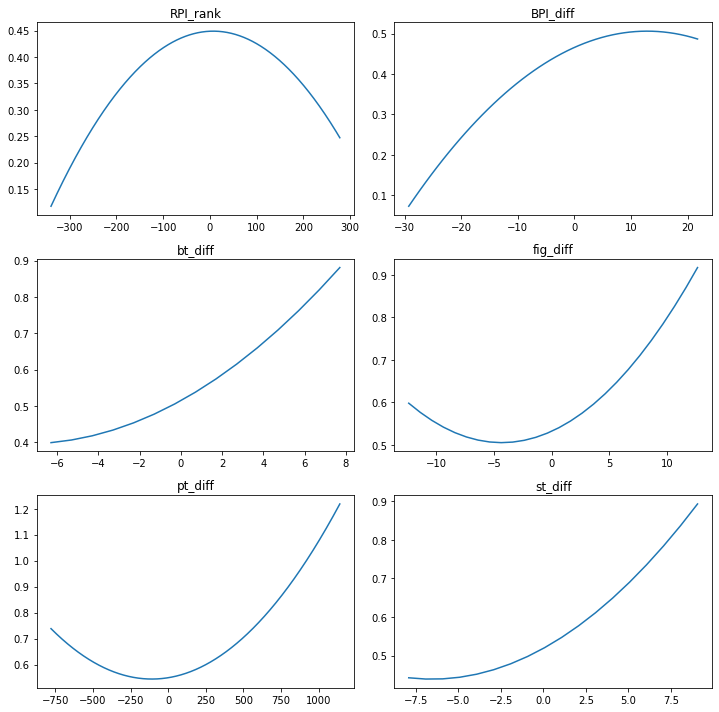

In [44]:
plt.figure(figsize=(10,10))
for index,variable in enumerate(['RPI_rank','BPI_diff','bt_diff','fig_diff','pt_diff','st_diff']):
    plt.subplot(3,2,index+1)
    plt.plot(np.arange(train_x_y[variable].min(),train_x_y[variable].max()),my_f(models_fited[variable].intercept_,models_fited[variable].coef_[1],models_fited[variable].coef_[2],np.arange(train_x_y[variable].min(),train_x_y[variable].max())))
    plt.title(variable)
    print(variable)
    print(models_fited[variable].intercept_,models_fited[variable].coef_[1],models_fited[variable].coef_[2])

In [45]:
def calProbWin(model,w_stat,l_stat):
    x=abs(w_stat-l_stat)
    poly=PolynomialFeatures(2)
    y=model.predict(poly.fit_transform(np.array(x).reshape(-1,1)))
    if (w_stat-l_stat)>0:
        return y
    else:
        return 1-y

In [46]:
def test_model(test_data,list_of_models):
    test_predictions=pd.DataFrame()
    for index,row in tqdm(test_data.iterrows(),total=len(test_data)):
        season=row['season']
        w_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['wteam'])]
        l_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['lteam'])]

        y_pred=0

        for index,variable in enumerate(['RPI_rank','BPI','btdiff','fgpdiff','ptdiff','stdiff']):
            y_pred+=calProbWin(list_of_models[index],w_team_stats[variable].values[0],l_team_stats[variable].values[0])


        x_y_values=pd.Series({'season':season,'w_team':row['wteam'],'lteam':row['lteam'],'w_perc':y_pred[0]/6})
        test_predictions=test_predictions.append(x_y_values,ignore_index=True)
    return test_predictions

In [47]:
def log_loss(df_w_predictions):
    print('log Loss is ',np.sum(np.log(df_w_predictions))/len(df_w_predictions)*-1)

In [48]:
list_of_models=list(models_fited.values())
train_data_predictions=test_model(data_train,list_of_models)
log_loss(train_data_predictions['w_perc'])

100%|██████████| 21382/21382 [01:46<00:00, 201.17it/s]

log Loss is  0.6366242040671194


RPI_rank
0.44893350179402447 3.9371852124049585e-05 -2.7537572274142895e-06
BPI_diff
0.465700589542259 0.006274031003423168 -0.0002445762777253625
bt_diff
0.5149440962018712 0.03146377686815976 0.0020808385002219977
fig_diff
0.5321228656761772 0.012399353158686422 0.0014342602076207725
pt_diff
0.5492516900419925 9.369140499535932e-05 4.326442588910452e-07
st_diff
0.5187070300364681 0.0243836010456956 0.0018617754254572243


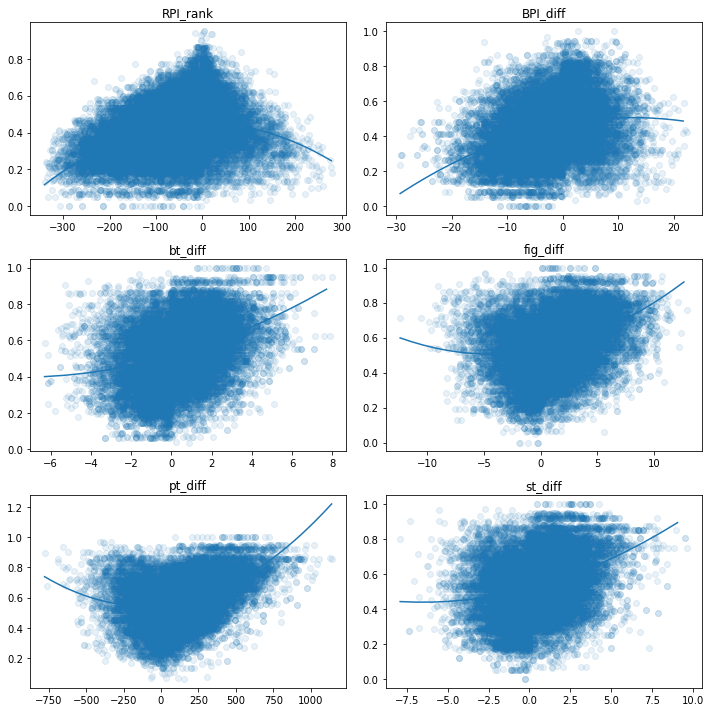

In [49]:
plt.figure(figsize=(10,10))
for index,variable in enumerate(['RPI_rank','BPI_diff','bt_diff','fig_diff','pt_diff','st_diff']):
    plt.subplot(3,2,index+1)
    plt.plot(np.arange(train_x_y[variable].min(),train_x_y[variable].max()),my_f(models_fited[variable].intercept_,models_fited[variable].coef_[1],models_fited[variable].coef_[2],np.arange(train_x_y[variable].min(),train_x_y[variable].max())))
    plt.scatter(train_x_y[variable],train_x_y['y_'+variable],alpha=0.1)
    plt.title(variable)
    print(variable)
    print(models_fited[variable].intercept_,models_fited[variable].coef_[1],models_fited[variable].coef_[2])

In [50]:
test_data=tourney_detailed_res[tourney_detailed_res['season']==2014]
test_data_prediction=test_model(test_data,list_of_models)
log_loss(test_data_prediction['w_perc'])
print('Correctly predicted '+str(len(test_data_prediction[test_data_prediction['w_perc']>0.5]))+' of '+str(len(test_data_prediction)))

100%|██████████| 67/67 [00:00<00:00, 155.86it/s]

log Loss is  0.6675214630767917
Correctly predicted 42 of 67


## Improving results

### generating train and test sets


In [51]:
train_dataset=pd.DataFrame()
import xgboost as xgb

for index,row in tqdm(data_train.iterrows(),total=len(data_train)):
    season=row['season']
    w_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['wteam'])]
    l_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['lteam'])]
    #choice=random.choice([True, False])
    if index % 2 ==0:
    #if choice:
        y=0
        team_1=l_team_stats
        team_2=w_team_stats
    else:
        y=1
        team_1=w_team_stats
        team_2=l_team_stats
    RPI_diff=team_1['RPI_rank'].values[0]-team_2['RPI_rank'].values[0]
    BPI_diff=team_1['BPI'].values[0]-team_2['BPI'].values[0]
    pt_diff=team_1['ptdiff'].values[0]-team_2['ptdiff'].values[0]
    st_diff=team_1['stdiff'].values[0]-team_2['stdiff'].values[0]
    bt_diff=team_1['btdiff'].values[0]-team_2['btdiff'].values[0]
    fg_diff=team_1['fgpdiff'].values[0]-team_2['fgpdiff'].values[0]

    x_y_values=pd.Series({'RPI_rank_diff':RPI_diff,'BPI_diff':BPI_diff,'pt_diff':pt_diff,'st_diff':st_diff,'bt_diff':bt_diff,'fig_diff':fg_diff,'y':y})
    train_dataset=train_dataset.append(x_y_values,ignore_index=True)

100%|██████████| 21382/21382 [01:19<00:00, 269.43it/s]


In [52]:
test_dataset=pd.DataFrame()
for index,row in tqdm(test_data.iterrows(),total=len(test_dataset)):
    season=row['season']
    w_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['wteam'])]
    l_team_stats=full_stats_data[(full_stats_data['season']==season)&(full_stats_data['team_id']==row['lteam'])]
    #choice=random.choice([True, False])
    if index % 2 ==0:
    #if choice:
        team_1=l_team_stats
        team_2=w_team_stats
        y=0
    else:
        team_1=w_team_stats
        team_2=l_team_stats
        y=1
    RPI_diff=team_1['RPI_rank'].values[0]-team_2['RPI_rank'].values[0]
    BPI_diff=team_1['BPI'].values[0]-team_2['BPI'].values[0]
    pt_diff=team_1['ptdiff'].values[0]-team_2['ptdiff'].values[0]
    st_diff=team_1['stdiff'].values[0]-team_2['stdiff'].values[0]
    bt_diff=team_1['btdiff'].values[0]-team_2['btdiff'].values[0]
    fg_diff=team_1['fgpdiff'].values[0]-team_2['fgpdiff'].values[0]

    x_y_values=pd.Series({'RPI_rank_diff':RPI_diff,'BPI_diff':BPI_diff,'pt_diff':pt_diff,'st_diff':st_diff,'bt_diff':bt_diff,'fig_diff':fg_diff,'y_test':y})
    test_dataset=test_dataset.append(x_y_values,ignore_index=True)

67it [00:00, 260.60it/s]


In [53]:
test_dataset.head()

,BPI_diff,RPI_rank_diff,bt_diff,fig_diff,pt_diff,st_diff,y_test
0,10.218750,19.0,-0.250000,-0.154333,125.0,-1.625000,1.0
1,-1.418004,-25.0,-2.107843,1.265485,96.0,1.273619,0.0
2,13.062500,-16.0,-0.620833,-5.449809,-149.0,2.906250,1.0
3,-11.500000,26.0,0.718750,2.220075,89.0,1.000000,0.0
4,-0.580214,-16.0,0.729055,-2.023744,154.0,3.180036,1.0


In [54]:
train_dataset.head()

,BPI_diff,RPI_rank_diff,bt_diff,fig_diff,pt_diff,st_diff,y
0,-3.610057,235.0,-2.805503,-4.947097,-235.0,1.894687,0.0
1,-7.880743,-168.0,3.907136,7.112879,519.0,0.698925,1.0
2,5.628676,75.0,1.507353,-5.378817,-397.0,0.893382,0.0
3,-7.061111,-273.0,2.933333,5.968777,616.0,-1.722222,1.0
4,13.777040,308.0,-4.321632,-6.406283,-621.0,-2.718216,0.0


### feature selection

In [55]:
from itertools import combinations
from sklearn.metrics import accuracy_score
for i in range(1,7):
    for comb in combinations(train_dataset.columns[:-1],i):
        X_train=train_dataset.loc[:,comb]
        y_train=train_dataset.iloc[:,-1]
        xgb_classifier=xgb.XGBClassifier(eval_metric=accuracy_score,objective='binary:logistic')
        xgb_classifier.fit(X_train, y_train)

        X_test=test_dataset.loc[:,comb]
        preds = xgb_classifier.predict(X_test)
        print('For chosen features'+str(comb)+' accuracy is '+str(accuracy_score(test_dataset.iloc[:,-1],preds)))


For chosen features('BPI_diff',) accuracy is 0.4925373134328358
For chosen features('RPI_rank_diff',) accuracy is 0.5970149253731343
For chosen features('bt_diff',) accuracy is 0.6119402985074627
For chosen features('fig_diff',) accuracy is 0.5074626865671642
For chosen features('pt_diff',) accuracy is 0.6417910447761194
For chosen features('st_diff',) accuracy is 0.44776119402985076
For chosen features('BPI_diff', 'RPI_rank_diff') accuracy is 0.6119402985074627
For chosen features('BPI_diff', 'bt_diff') accuracy is 0.5373134328358209
For chosen features('BPI_diff', 'fig_diff') accuracy is 0.5223880597014925
For chosen features('BPI_diff', 'pt_diff') accuracy is 0.6119402985074627
For chosen features('BPI_diff', 'st_diff') accuracy is 0.43283582089552236
For chosen features('RPI_rank_diff', 'bt_diff') accuracy is 0.5970149253731343
For chosen features('RPI_rank_diff', 'fig_diff') accuracy is 0.5970149253731343
For chosen features('RPI_rank_diff', 'pt_diff') accuracy is 0.62686567164179

In [56]:
X_train=train_dataset.loc[:,('RPI_rank_diff', 'fig_diff', 'pt_diff', 'st_diff')]
y_train=train_dataset.iloc[:,-1]
xgb_classifier=xgb.XGBClassifier(eval_metric=accuracy_score,objective='binary:logistic')
xgb_classifier.fit(X_train, y_train)

X_test=test_dataset.loc[:,('RPI_rank_diff', 'fig_diff', 'pt_diff', 'st_diff')]
preds = xgb_classifier.predict(X_test)
print('For chosen features RPI_rank_diff, fig_diff, pt_diff, st_diff accuracy is '+str(accuracy_score(test_dataset.iloc[:,-1],preds)))

For chosen features RPI_rank_diff, fig_diff, pt_diff, st_diff accuracy is 0.7313432835820896


<BarContainer object of 4 artists>

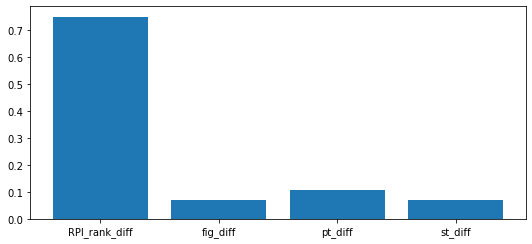

In [57]:
feat_important=xgb_classifier.feature_importances_
plt.bar(['RPI_rank_diff', 'fig_diff', 'pt_diff', 'st_diff'],feat_important)

In [58]:
results=preds-test_dataset.iloc[:,-1]
print('Model predicted '+str(results[results==0].count())+' matches correctily out of 67')

Model predicted 49 matches correctily out of 67
